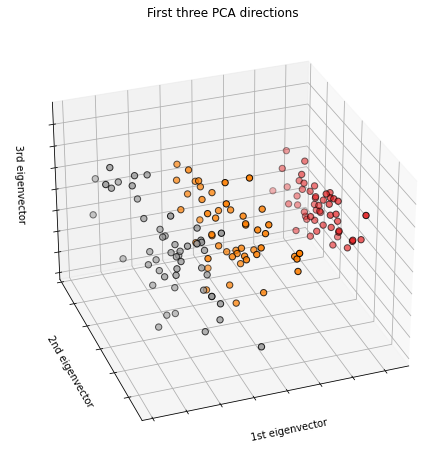

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.neighbors import NearestNeighbors

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()

# The features are Sepal Length, Sepal Width, Petal Length and Petal Width
X = iris.data
y = iris.target

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Scikit Learn Implementation
Check the [official documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html?highlight=nearest%20neighbor#sklearn.neighbors.NearestNeighbors) for what you can do with it. The model is unsupervised meaning that it is as fit for classification, regression or unsupervised tasks.

Here we are using it for a classification task by making use of [train_test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to validate our model using the [accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [4]:
neigh = NearestNeighbors(n_neighbors=1, radius=0.4)
neigh.fit(X_train)

[neigh_dist, neigh_idx] = neigh.kneighbors(X_test)

# unpacking each singular array
neigh_idx = [item[0] for item in neigh_idx]
y_pred = y_train[neigh_idx]
acc = accuracy_score(y_pred, y_test, normalize=True)
print(f"Accuracy is at: {acc}%")

Accuracy is at: 0.98%


# From Scratch Implementation
Here we will implement the NearestNeighbors model with the following functionality:
- [X] NearestNeighbors will be a Class with specific parameters
- [X] This class will have a fit function which will simply store the right data
- [X] It will have a kneighbors function that will return the indices of the data points that are closest using euclidean distance. The search will happen with a brute force approach.

In [6]:
import math
import numpy

class MyNearestNeighbors:
    def __init__(self, n_neighbors=2):
        self.n_neighbors = n_neighbors
        
    def fit(self, X):
        self.X = X
        
    def kneighbors(self, X_test):
        neighbors = []
        for x_test in X_test:
            distances = []
            for x in self.X:
                distances.append(math.sqrt(sum([math.pow((x_i - x_test_i), 2) for x_i, x_test_i in zip(x, x_test)])))
            sorted_index = numpy.argsort(distances)
            neighbors.append(sorted_index[0:self.n_neighbors])
            
        return neighbors
            
neigh = MyNearestNeighbors(n_neighbors=1)
neigh.fit(X_train)
neigh_idx = neigh.kneighbors(X_test)
neigh_idx = [item[0] for item in neigh_idx]
y_pred = y_train[neigh_idx]
acc = accuracy_score(y_pred, y_test, normalize=True)
print(f"Accuracy is at: {acc}%")

Accuracy is at: 0.98%
